              name sex  number  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1957041      Zylas   M       5  2018
1957042      Zyran   M       5  2018
1957043      Zyrie   M       5  2018
1957044      Zyron   M       5  2018
1957045      Zzyzx   M       5  2018

[1957046 rows x 4 columns]
sex  name     
F    Aabha        35
     Aabidah       5
     Aabriella    38
     Aada         13
     Aadaya        8
                  ..
M    Zyus         11
     Zyvion        5
     Zyvon         7
     Zyyon         6
     Zzyzx        10
Name: number, Length: 109173, dtype: int64
name
Aaban     114
Aabid      16
Aabir      10
Aadam     273
Aadan     130
         ... 
Zyus       11
Zyvion      5
Zyvon       7
Zyyon       6
Zzyzx      10
Name: number, Length: 41475, dtype: int64
name
Aabha        35
Aabidah       5
A

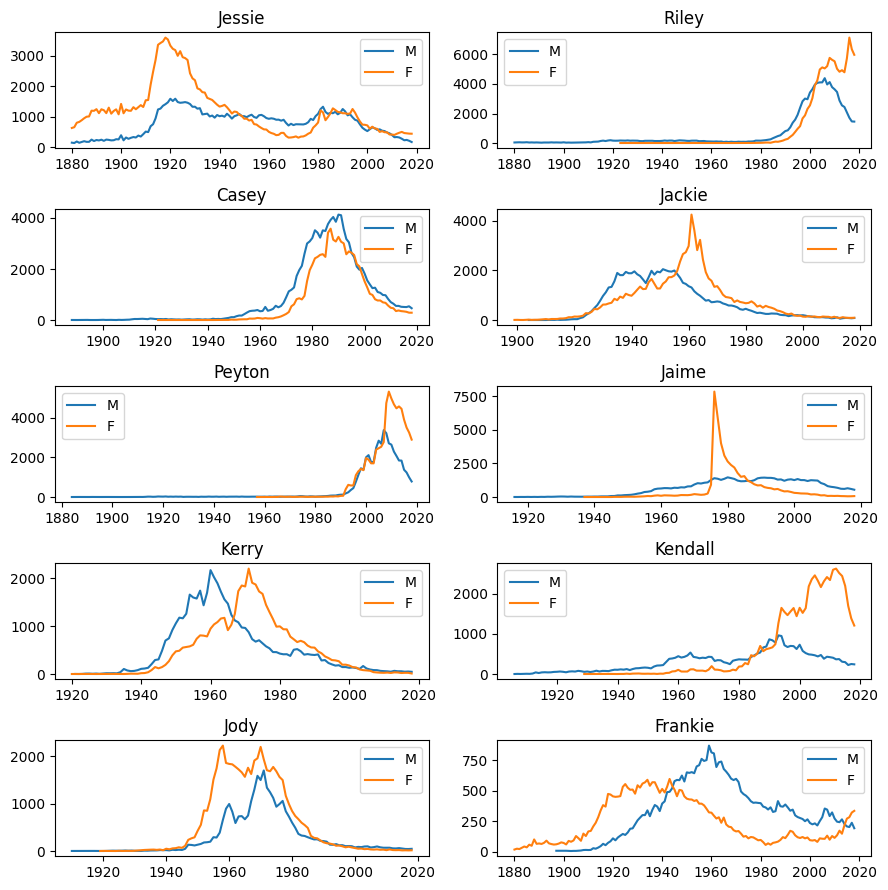

In [17]:
# Imports
import math
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

# Enables inline plotting in Jupyter
%matplotlib inline

# Adjust pandas options
pd.options.display.max_rows = 10

# Load the dataset
allyears = pd.read_csv('allyears.csv.gz')

# Display the first few rows of the dataset
print(allyears)

# Total number across all years, grouped by sex and name
totals = allyears.groupby(['sex', 'name']).number.sum()
print(totals)

# Split into male and female totals
male, female = totals.loc['M'], totals.loc['F']

# Display male and female totals
print(male)
print(female)

# Compute the ratio of male and female totals (Pandas aligns axes automatically)
# Drop NaNs that occur where only one Series has a value
ratios = (totals.loc['M'] / totals.loc['F']).dropna()

# Display ratios where they are between 0.5 and 2
print(ratios[(ratios > 0.5) & (ratios < 2)])

# Names that fit the unisex ratio constraint
unisex = ratios[(ratios > 0.5) & (ratios < 2)].index
print(unisex)

# Sorted and capped M + F totals for unisex names; results in array of top ten unisex counts, indexed by name
common = (male.loc[unisex] + female.loc[unisex]).sort_values(ascending=False).head(10)
print(common)

# Index the data by sex, name, and year
allyears_indexed = allyears.set_index(['sex', 'name', 'year']).sort_index()

# Plot the top ten unisex names
pp.figure(figsize=(9, 9))

# Loop over top-ten unisex names and plot their trends
for i, name in enumerate(common.index):
    pp.subplot(5, 2, i + 1)

    pp.plot(allyears_indexed.loc['M', name], label='M')
    pp.plot(allyears_indexed.loc['F', name], label='F')

    pp.legend()
    pp.title(name)

# Improve subplot spacing
pp.tight_layout()

# Show the plot
pp.show()
